In [1]:
# Necessary Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
# For k-means clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [2]:
# Read dataset
df=pd.read_csv("data.csv")

In [3]:
# Display Dataset
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [4]:
# Display information about dataset
# Begin of data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [5]:
# Drop columns that will not contribute to the model.
# Drop column registration_date because it looks a lot like year. Same year only as an extra there is a month.
df.drop(columns=['Unnamed: 0', 'offer_description', 'registration_date'], inplace=True)

# Display total null value number column by column
df.isnull().sum()

brand                           0
model                           0
color                         166
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
dtype: int64

In [6]:
# Fill in empty categorical data (color) with unknown
df['color'] = df['color'].fillna('unknown')

# Display total null value number column by column
df.isnull().sum()

brand                           0
model                           0
color                           0
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
dtype: int64

In [7]:
# Converting numeric objects to numeric variables
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace(r'-.*', pd.NA, regex=True)
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].str.replace(' g/km', '', regex=False)
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

df['price_in_euro'] = df['price_in_euro'].str.replace(' €', '', regex=False)
df['price_in_euro'] = df['price_in_euro'].str.replace('.', '', regex=False)
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

df['power_kw'] = pd.to_numeric(df['power_kw'], errors='coerce')

df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')

# Display total null value number column by column
df.isnull().sum()

brand                           0
model                           0
color                           0
year                            0
price_in_euro                 199
power_kw                      293
power_ps                      210
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    29172
fuel_consumption_g_km       42250
mileage_in_km                 152
dtype: int64

In [8]:
# Fill missing numeric values with the mean
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].fillna(df['fuel_consumption_l_100km'].mean())
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].fillna(df['fuel_consumption_g_km'].mean())
df['price_in_euro'] = df['price_in_euro'].fillna(df['price_in_euro'].mean())
df['power_kw'] = df['power_kw'].fillna(df['power_kw'].mean())
df['power_ps'] = df['power_ps'].fillna(df['power_ps'].mean())
df['mileage_in_km'] = df['mileage_in_km'].fillna(df['mileage_in_km'].mean())

# Display total null value number column by column
df.isnull().sum()

brand                       0
model                       0
color                       0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
dtype: int64

In [9]:
# Display information about dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     251079 non-null  object 
 3   year                      251079 non-null  object 
 4   price_in_euro             251079 non-null  float64
 5   power_kw                  251079 non-null  float64
 6   power_ps                  251079 non-null  float64
 7   transmission_type         251079 non-null  object 
 8   fuel_type                 251079 non-null  object 
 9   fuel_consumption_l_100km  251079 non-null  float64
 10  fuel_consumption_g_km     251079 non-null  float64
 11  mileage_in_km             251079 non-null  float64
dtypes: float64(6), object(6)
memory usage: 23.0+ MB


,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,alfa-romeo,Alfa Romeo GTV,red,1995,1300.0,148.0,201.0,Manual,Petrol,10.900000,260.000000,160500.0
1,alfa-romeo,Alfa Romeo 164,black,1995,24900.0,191.0,260.0,Manual,Petrol,6.487279,140.802646,190000.0
2,alfa-romeo,Alfa Romeo Spider,black,1995,5900.0,110.0,150.0,Unknown,Petrol,6.487279,140.802646,129000.0
3,alfa-romeo,Alfa Romeo Spider,black,1995,4900.0,110.0,150.0,Manual,Petrol,9.500000,225.000000,189500.0
4,alfa-romeo,Alfa Romeo 164,red,1996,17950.0,132.0,179.0,Manual,Petrol,7.200000,140.802646,96127.0


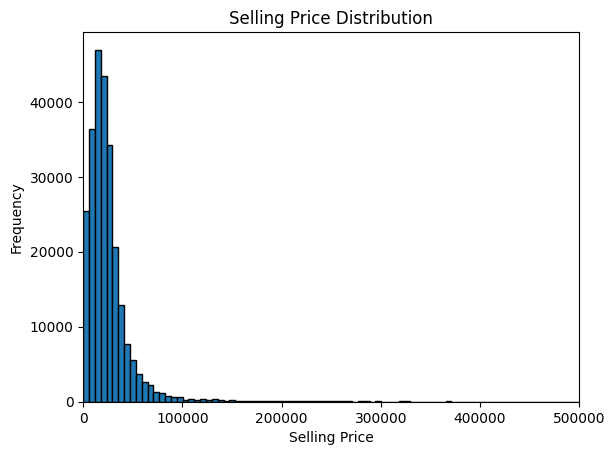

In [10]:
# create selling price in euros distribution graphic with using matplotlib library.
plt.hist(df['price_in_euro'], bins=1000, edgecolor='black')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.xlim(0, 500000)
plt.ylabel('Frequency')
plt.show()

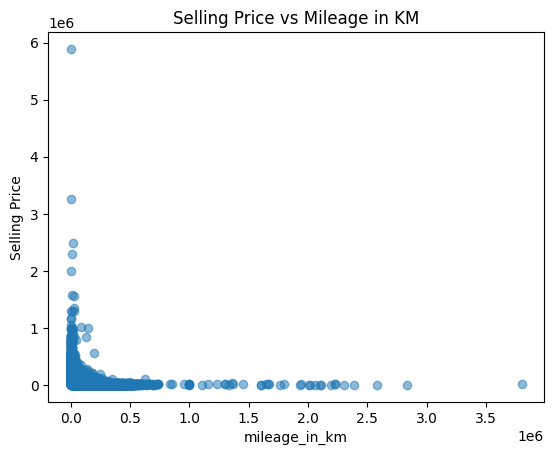

In [11]:
# Create scatter plot graphic
plt.scatter(df['mileage_in_km'], df['price_in_euro'], alpha=0.5)
plt.title('Selling Price vs Mileage in KM')
plt.xlabel('mileage_in_km')
plt.ylabel('Selling Price')
plt.show()

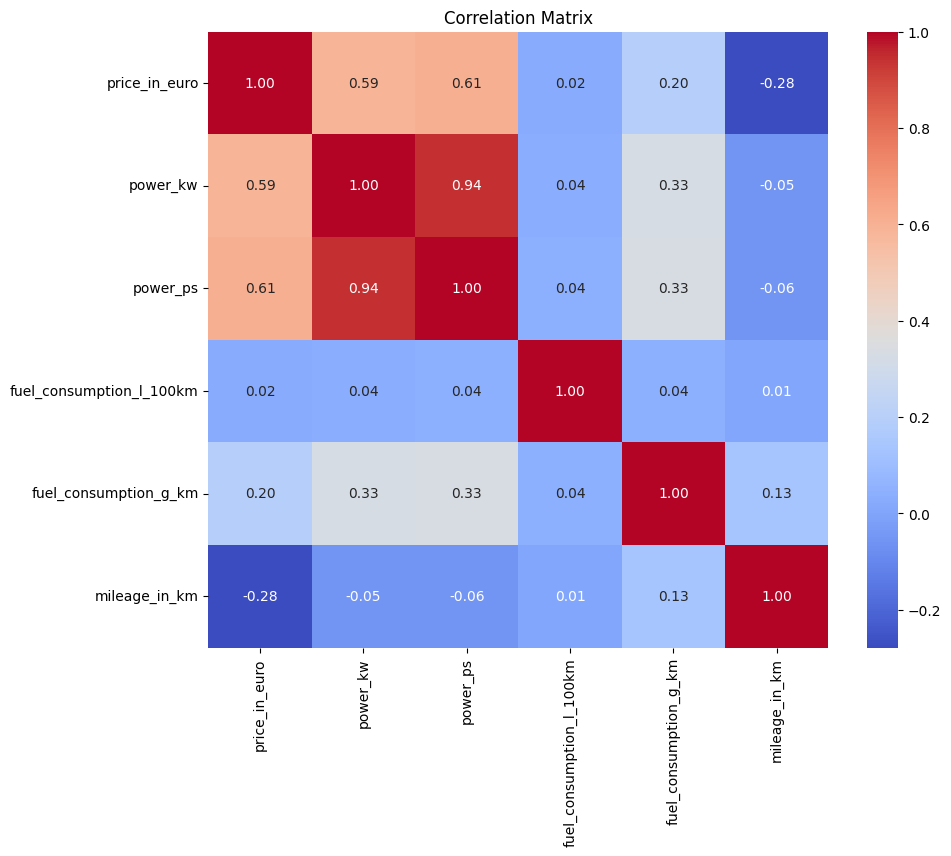

In [12]:
# Only taking numerics into account
numeric_df = df.select_dtypes(include='number')

# Creating the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

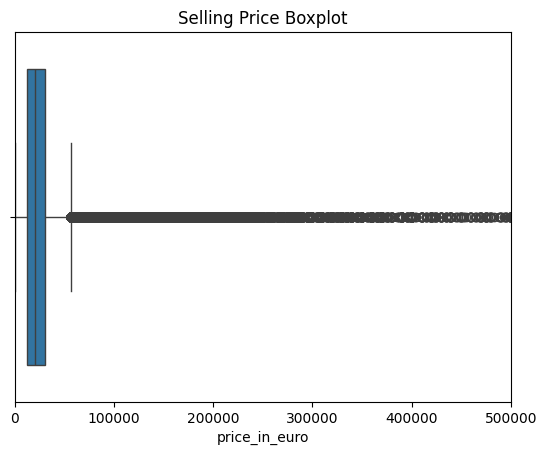

In [13]:
# Create selling price boxplot 
sns.boxplot(x=df['price_in_euro'])
plt.title('Selling Price Boxplot')
plt.xlim(0, 500000)
plt.show()
# End of dataPreprocessing

In [14]:
# Scaling with only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_scaled = df.copy() # Create a copy of the original to avoid modifying it
# Calculates mean and standard deviation and scales the data with z-score normalization
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df[numeric_columns].agg(['mean', 'std']) # Display the mean and standard deviation of the original table



,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
mean,26137.530002,126.477379,171.809526,6.487279,140.802646,85340.015985
std,36973.292968,75.257813,99.150710,26.746251,61.596270,78693.230409


In [15]:
# Z-score normalization of the numeric columns
df_scaled[numeric_columns].head()
# if the value is on average the z-score is 0, if it is above average the z-score is positive, if it is below average the z-score is negative.


,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,-0.671771,0.285986,0.294406,0.164985,1.935143,0.955103
1,-0.033471,0.857356,0.889461,0.000000,0.000000,1.329977
2,-0.547356,-0.218946,-0.219964,0.000000,0.000000,0.554814
3,-0.574403,-0.218946,-0.219964,0.112641,1.366926,1.323623
4,-0.221445,0.073383,0.072521,0.026648,0.000000,0.137077


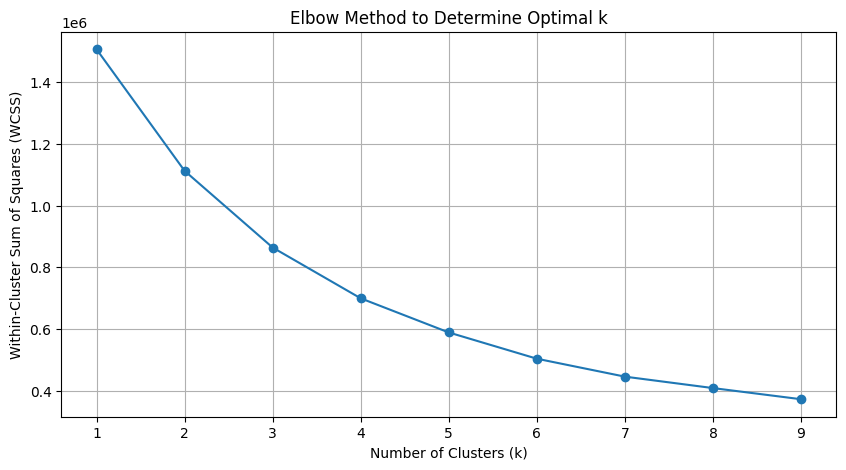

In [16]:
# Standardize the data
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Elbow method
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=17)
    kmeans.fit(df_scaled[numeric_columns])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


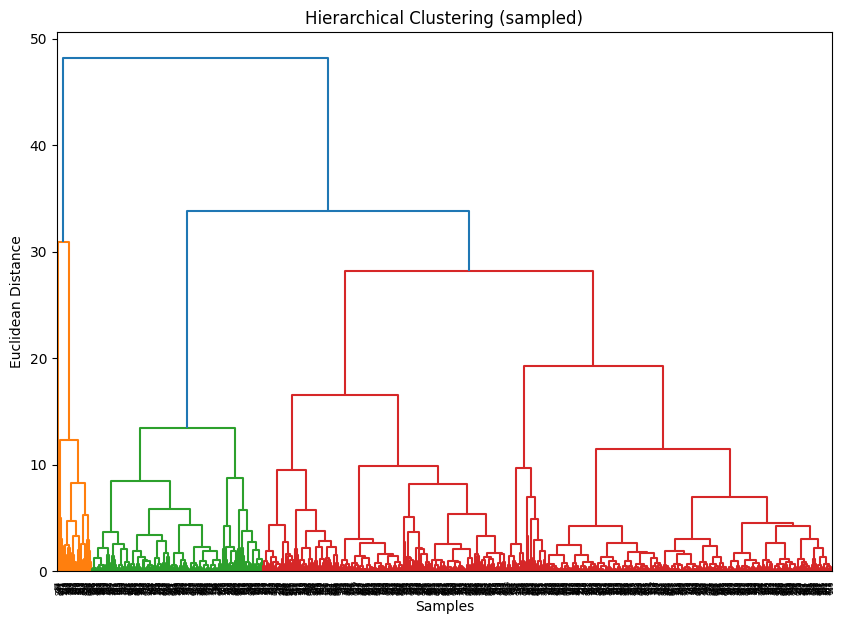

In [17]:
# 1000 raws sample for hierarchical clustering
df_sample = df_scaled.sample(n=1000, random_state=17) # 1000 because after 10000 inputs time is extremely long

plt.figure(figsize=(10, 7))
dendrogram(linkage(df_sample[numeric_columns], method='ward')) # ward because it minimizes the variance within each cluster
plt.title('Hierarchical Clustering (sampled)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


In [18]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
df_cat = df[categorical_columns].fillna('unknown').astype(str)

# Make list every row
transactions = df_cat.values.tolist()

# Turn to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df_basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Show first 10 meaningful rules
rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
173,(Volkswagen Golf),"(volkswagen, Petrol)",0.030222,0.072240,0.020631,0.682657,9.449818,1.0,0.018448,2.923522,0.922043,0.252117,0.657947,0.484123
170,(Volkswagen Golf),"(Manual, volkswagen)",0.030222,0.076737,0.020137,0.666315,8.683125,1.0,0.017818,2.766872,0.912408,0.231937,0.638581,0.464366
172,"(Volkswagen Golf, Petrol)",(volkswagen),0.020631,0.132552,0.020631,1.000000,7.544214,1.0,0.017896,inf,0.885721,0.155644,1.000000,0.577822
81,(Volkswagen Golf),(volkswagen),0.030222,0.132552,0.030222,1.000000,7.544214,1.0,0.026216,inf,0.894481,0.227998,1.000000,0.613999
168,"(Volkswagen Golf, Manual)",(volkswagen),0.020137,0.132552,0.020137,1.000000,7.544214,1.0,0.017468,inf,0.885275,0.151919,1.000000,0.575959
29,(Electric),(Automatic),0.023769,0.524731,0.022929,0.964645,1.838360,1.0,0.010456,13.442672,0.467140,0.043627,0.925610,0.504171
30,(Hybrid),(Automatic),0.050307,0.524731,0.046619,0.926688,1.766025,1.0,0.020221,6.482850,0.456733,0.088223,0.845747,0.507766
147,"(ford, Petrol)",(Manual),0.041198,0.469450,0.032563,0.790410,1.683694,1.0,0.013223,2.531370,0.423516,0.068112,0.604957,0.429888
130,(mercedes-benz),"(Automatic, Petrol)",0.108436,0.241784,0.043687,0.402887,1.666306,1.0,0.017469,1.269802,0.448504,0.142521,0.212476,0.291787
153,(opel),"(Manual, Petrol)",0.081202,0.325846,0.044026,0.542182,1.663922,1.0,0.017567,1.472537,0.434274,0.121277,0.320900,0.338647
